In [ ]:
# HOD assignment
# take dataset, clean blah blah, check accuracy for train and test and then visualize and spot where it is overfitting
# decision tree

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = ('/content/drive/MyDrive/practise/Academic Assignment (Responses) - Form Responses 1.csv')
df = pd.read_csv(filepath)

In [ ]:
df.head()

,Timestamp,Sex,Age (in years),Weight in Kilograms(Kgs),Height in centimeters(cms),What state do you belong to?
0,6/15/2023 12:59:17,Male,28,60,162,NaN
1,6/15/2023 13:04:17,Female,27,80,163,NaN
2,6/15/2023 13:04:40,Male,23,110,175,NaN
3,6/15/2023 13:06:27,Male,23,85,180,NaN
4,6/15/2023 13:19:24,Female,21,46,164,NaN


In [ ]:
df.isnull().sum()

Timestamp                        0
Sex                              0
Age (in years)                   0
Weight in Kilograms(Kgs)         0
Height in centimeters(cms)       0
What state do you belong to?    19
dtype: int64

<ipython-input-88-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

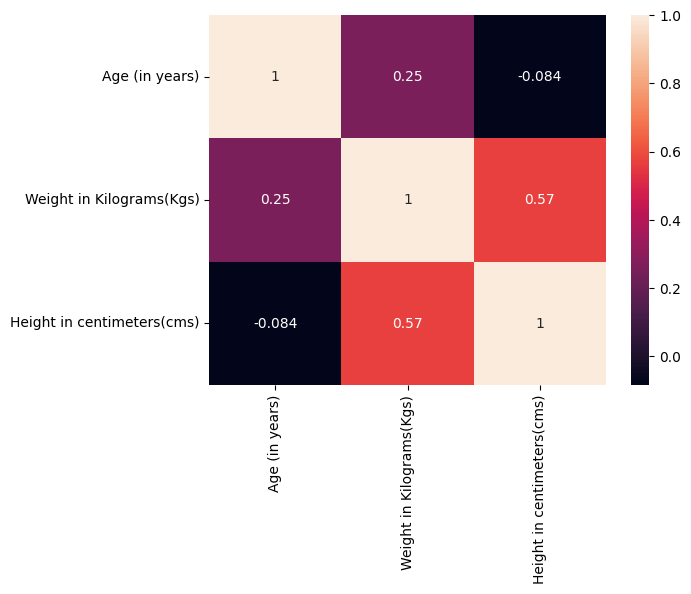

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
true_bmi = lambda row: row['Weight in Kilograms(Kgs)'] / ((row['Height in centimeters(cms)'] / 100) ** 2)

In [ ]:
df['BMI'] = df.apply(true_bmi, axis = 1)

In [ ]:
df['Sex'] = df['Sex'].replace({'Female': 1, 'Male': 0})

In [ ]:
df

,Timestamp,Sex,Age (in years),Weight in Kilograms(Kgs),Height in centimeters(cms),What state do you belong to?,BMI
0,6/15/2023 12:59:17,0,28,60,162,NaN,22.862369
1,6/15/2023 13:04:17,1,27,80,163,NaN,30.110279
2,6/15/2023 13:04:40,0,23,110,175,NaN,35.918367
3,6/15/2023 13:06:27,0,23,85,180,NaN,26.234568
4,6/15/2023 13:19:24,1,21,46,164,NaN,17.102915
5,6/15/2023 13:37:42,0,22,67,182,NaN,20.227026
6,6/15/2023 13:48:45,0,22,70,181,NaN,21.366869
7,6/15/2023 14:07:37,1,25,52,152,NaN,22.506925
8,6/15/2023 14:40:28,0,28,91,185,NaN,26.588751
9,6/15/2023 14:52:38,0,24,70,177,NaN,22.343516


In [ ]:
X = df[['Weight in Kilograms(Kgs)', 'Height in centimeters(cms)']]
y = df['Sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
df2 = model.fit(X, y)
pred = model.predict(X)

In [ ]:
predicted = model.predict(X_test)

In [ ]:
pred[:5]

array([0, 1, 0, 0, 1])

In [ ]:
df['y_hat'] = pred
df['err'] = abs(df.y_hat - df.Sex)
df[df.err == 1]

,Timestamp,Sex,Age (in years),Weight in Kilograms(Kgs),Height in centimeters(cms),What state do you belong to?,BMI,y_hat,err


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y, pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        15

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



In [ ]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


KeyError: ignored

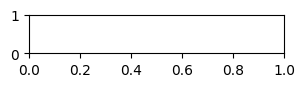

In [ ]:
import dtreeviz
viz = dtreeviz.model(model, X, y,
           target_name='Sex',
           feature_names=df[['Weight in Kilograms(Kgs)', 'Height in centimeters(cms)']],
           class_names=list(df['Sex']))
viz.view(scale = 1)

[Text(0.45454545454545453, 0.9, 'x[1] <= 165.5\ngini = 0.449\nsamples = 44\nvalue = [29, 15]'),
 Text(0.18181818181818182, 0.7, 'x[0] <= 57.5\ngini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.2727272727272727, 0.5, 'x[1] <= 159.5\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.18181818181818182, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.36363636363636365, 0.3, 'x[0] <= 73.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2727272727272727, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.45454545454545453, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7272727272727273, 0.7, 'x[0] <= 51.5\ngini = 0.133\nsamples = 28\nvalue = [26, 2]'),
 Text(0.6363636363636364, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8181818181818182, 0.5, 'x[1] <= 169.5\ngini = 0.071\nsamples = 27\nvalue = [26, 1]'),
 Text(0.7272727272727273, 0.3, 'x[0] <= 78.5\ngini = 0.444\ns

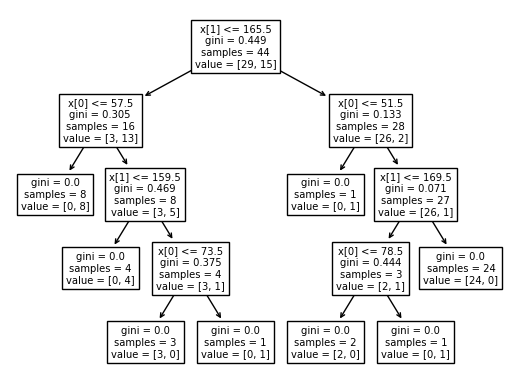

In [ ]:
tree.plot_tree(df2)